In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Charger ce dataset.

In [3]:
df = pd.read_csv("../J1/HeartDiseaseUCI.csv", index_col=0)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


#### Variables:
- **age**: age in years  
(numérique)
- **sex**: sex (1 = male, 0 = female)  
(binaire)
- **cp**: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-angina pain, Value 4: asymptomatic)  
(catégorielle)
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)  
(numérique)
- **chol**: serum cholesterol in mg/dl  
(numérique)
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
(binaire)
- **restecg**: resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)  
(catégorielle)
- **thalach**: maximum heart rate achieved  
(numérique)
- **exang**: exercise induced angina (1 = yes, 0 = no)  
(binaire)
- **oldpeak** = ST depression induced by exercise relative to rest  
(numérique)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)   
(ordinale)
- **ca**: number of major vessels (0-3) colored by fluoroscopy  
(numérique)
- **thal**: (Value 3: normal, Value 6 = fixed defect, Value 7 = reversible defect)  
(catégorielle)
- **num**: number of major vessels (0-4) with >50% diameter narrowing  
(catégorielle)
- **target**: number of major vessels (0-1)  
(binaire)


In [5]:
num_variables = ["age", "trestbps", "chol", "thalach", "ca", "oldpeak"]
cat_variables = ["cp", "restecg", "thal"]
ord_variables = ["slope"]
bin_variables = ["sex", "fbs", "exang"]

### 2. Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.).

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


### 3. Remplacer la variable 'num' par une variable binaire indiquant la survenue ou non d'une maladie cardiaque.

In [8]:
def set_num(x):
    if x == 0:
        return 0
    else:
        return 1

In [9]:
df["target"] = df["num"].apply(set_num)

In [10]:
# df["target"] = df["num"].replace([1,2,3,4], 1)
# df["target"] = np.where(df["num"] >= 1, 1, 0)

### 4. Procéder à une étude exploratoire de ce dataset : étude individuelle des différentes variables, puis étude conjointe avec la variable 'num'.

- num_variables = ["age", "trestbps", "chol", "thalach", "ca", "oldpeak"]
- cat_variables = ["cp", "restecg", "thal"]
- ord_variables = ["slope"]
- bin_variables = ["sex", "fbs", "exang", "target"]

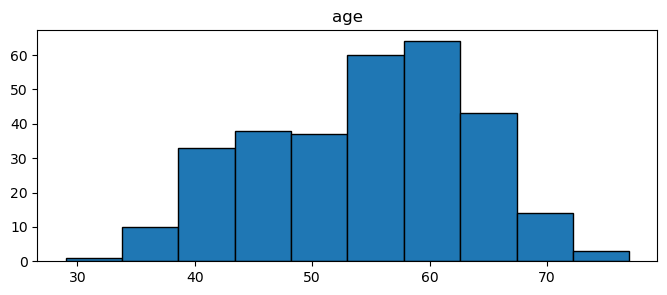

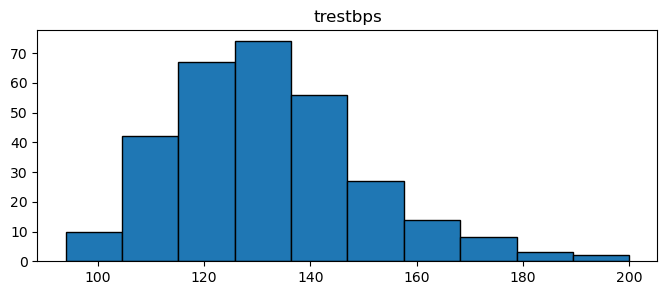

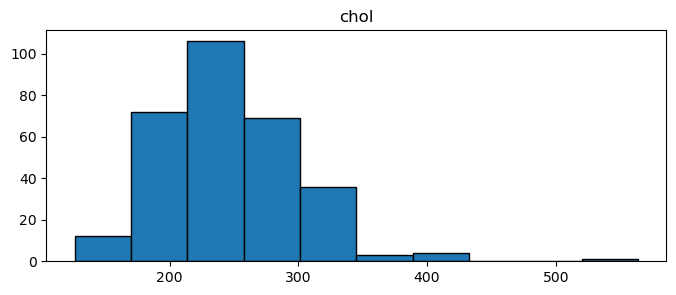

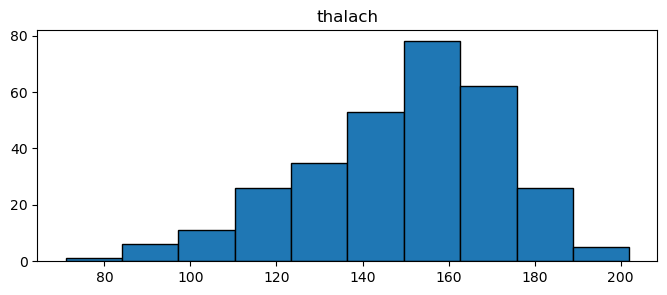

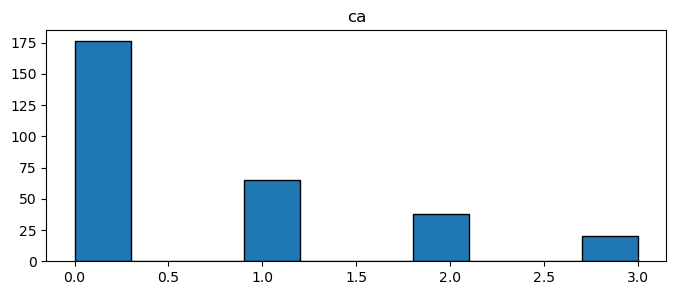

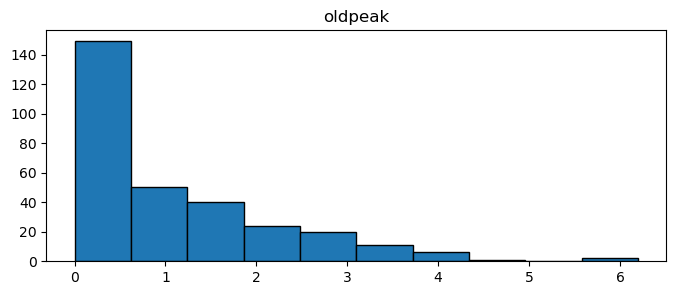

In [11]:
for col in num_variables:
    plt.figure( figsize = (8, 3) )
    plt.hist(df[col], edgecolor = "black")
    plt.title(col)
    # plt.xlabel("age de la personne")
    # plt.ylabel("nombre de personnes")
    plt.show()

<AxesSubplot:>

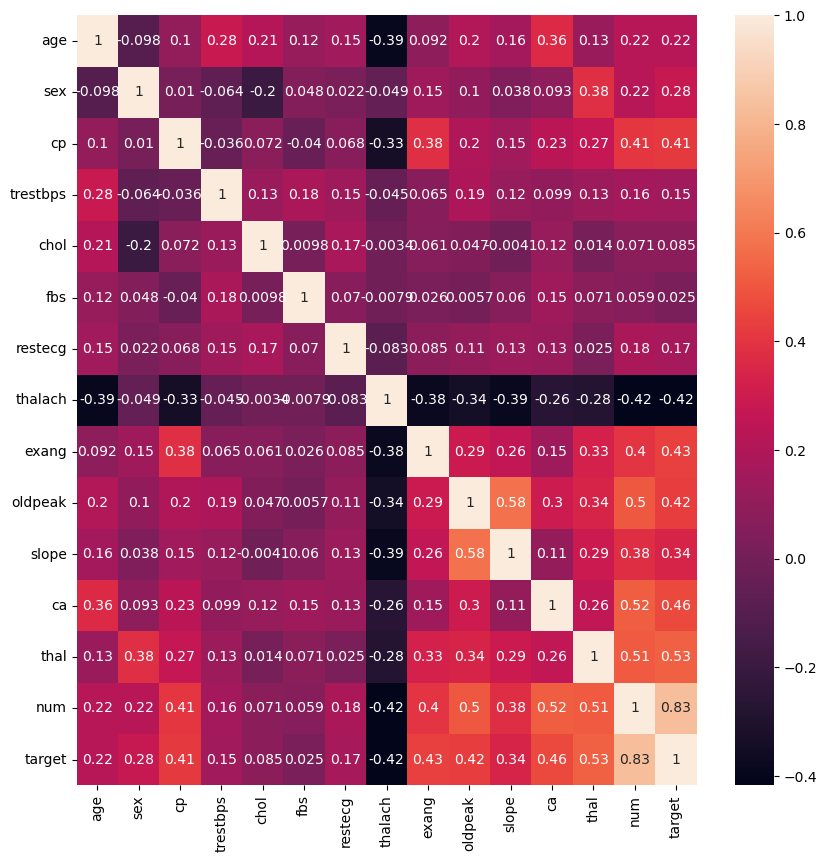

In [12]:
plt.figure( figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='age', ylabel='trestbps'>

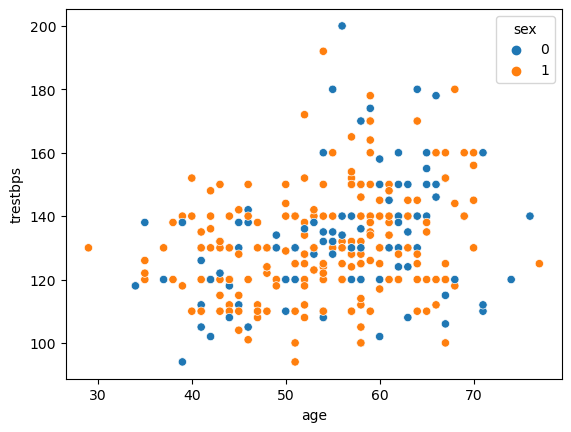

In [13]:
sns.scatterplot(data = df, x = "age", y = "trestbps", hue = "sex")

### 5. Séparer le dataset en un jeu d'entraînement/validation et un jeu de test. On utilisera la fonction train_test_split.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(["target", "num"], axis=1)
y = df["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df["target"])

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### 6. Créer un pipeline de transformation des variables quantitatives : imputation puis normalisation.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

In [19]:
num_pipeline = Pipeline(steps = [
    ("imputer", KNNImputer()),
    ("normalization", MinMaxScaler())
])

### 7. Créer un pipeline de transformation des variables qualitatives : imputation puis One Hot Encoding ou Ordinal Encoding.

Le One Hot Encoding peut être réalisé directement avec Pandas :
```
pd.get_dummies(df["cp"], prefix = "ohe_", drop_first=True)
```

In [20]:
cat_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first"))
    ]
)
ord_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder())
    ]
)
bin_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

### 8. Regrouper les pipelines précédents à l'aide de la fonction Column Transformer.

In [21]:
preprocessor = ColumnTransformer(transformers=
     [
        ("numeric", num_pipeline, num_variables),
        ("categorical", cat_pipeline, cat_variables),
        ("ordinal", ord_pipeline, ord_variables),
        ("binary", bin_pipeline, bin_variables),
     ]
 )

In [22]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('normalization',
                                                  MinMaxScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach', 'ca',
                                  'oldpeak']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['cp', 'restecg', 'thal']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['slope']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['sex', 'fbs', 'exang'])])

In [23]:
X_train_clean = preprocessor.fit_transform(X_train)

In [24]:
X_test_clean = preprocessor.transform(X_test)

In [25]:
pd.DataFrame(X_train_clean).to_csv("./X_train_clean_knn.csv", index=False)
pd.DataFrame(X_test_clean).to_csv("./X_test_clean_knn.csv", index=False)
pd.DataFrame(y_train).to_csv("./y_train_knn.csv", index=False)
pd.DataFrame(y_test).to_csv("./y_test_knn.csv", index=False)